In [5]:
import numpy as np
import networkx as nx
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import os
import linecache
import random

In [17]:
import sys
root_dir = "\\".join(sys.path[0].split("\\")[:-2])

In [20]:
KG = nx.read_gpickle(root_dir+"\\data\\graph\\training_KG_concepts.gpickle")
G = nx.convert_node_labels_to_integers(KG)

In [3]:
all_nodes = list(KG.nodes)

10000 pivots

In [123]:
# betweenness_dict_10000 = nx.betweenness_centrality(KG, k=10000)
# np.save(root_dir+"\\data\\betweenness\\betweenness_dict_10000.npy", betweenness_dict_10000)

In [21]:
betweenness_dict_10000 = np.load(
    root_dir+"\\data\\betweenness\\betweenness_dict_10000.npy",
    allow_pickle=True
).item()

In [26]:
edges_cc = pd.read_csv(root_dir+"\\data\\og\\edges_cc.csv")
all_edges = [
    (edges_cc.src[i], edges_cc.dst[i]) \
    for i \
    in range(len(edges_cc))
]

In [29]:
training_edges = list(KG.edges())
validation_edges = list(set(all_edges)-set(training_edges))

In [ ]:
training_betweenness = [
    max(betweenness_dict_10000[edge[0]], betweenness_dict_10000[edge[1]]) \
    for edge in training_edges
]

In [ ]:
validation_betweenness = [
    max(betweenness_dict_10000[edge[0]], betweenness_dict_10000[edge[1]]) \
    for edge in validation_edges \
    if edge[0] in betweenness_dict_1000 \
    and edge[1] in betweenness_dict_1000
]

In [113]:
n = 1000
all_pairs = []
no_edge = []
validation = validation_betweenness
while len(all_pairs)<n or len(no_edge)<n or len(validation)<n:
    pair = sample_node_pair(G)
    all_pairs.append((all_nodes[pair[0]], all_nodes[pair[1]]))
    if pair not in G.edges and pair[::-1] not in G.edges:
        KG_pair = (all_nodes[pair[0]], all_nodes[pair[1]])
        if KG_pair not in validation_edges and KG_pair[::-1] not in validation_edges:
            no_edge.append(KG_pair)

Betweenness Centrality Measurements

In [168]:
all_pairs_betweenness = []
for i in set(itertools.chain(*all_pairs)):
    try:
        all_pairs_betweenness.append(betweenness_dict_10000[i])
    except:
        continue
no_edge_betweenness = []
for i in set(itertools.chain(*no_edge)):
    try:
        no_edge_betweenness.append(betweenness_dict_10000[i])
    except:
        continue
training_betweenness = []
for i in set(itertools.chain(*training_edges)):
    try:
        training_betweenness.append(betweenness_dict_10000[i])
    except:
        continue
validation_betweenness = []
for i in set(itertools.chain(*validation_edges)):
    try:
        validation_betweenness.append(betweenness_dict_10000[i])
    except:
        continue
print(
    np.mean(all_pairs_betweenness),
    np.mean(no_edge_betweenness),
    np.mean(training_betweenness),
    np.mean(validation_betweenness)
)
print(
    np.median(all_pairs_betweenness),
    np.median(no_edge_betweenness),
    np.median(training_betweenness),
    np.median(validation_betweenness)
)

3.152923470410504e-05 3.152923470410504e-05 4.868083758260043e-05 6.070955215276072e-05
2.5454035829468216e-08 2.5454035829468216e-08 1.673187125220225e-08 9.015066146597986e-08


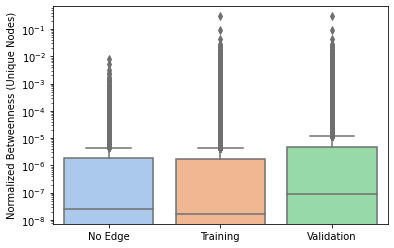

In [173]:
df = pd.DataFrame(
    data = {
    "Normalized Betweenness (Unique Nodes)" : no_edge_betweenness+training_betweenness+validation_betweenness,
    "" : ["No Edge"]*len(no_edge_betweenness)+["Training"]*len(training_betweenness)+["Validation"]*len(validation_betweenness)
    }
)

#palette = {"Training": "#ABC9EA", "Validation": "#EFB792"}
palette = sns.color_palette("pastel")
g = sns.boxplot(x="", y="Normalized Betweenness (Unique Nodes)",
                data=df, palette=palette)
g.set_yscale("log")

In [166]:
all_pairs_betweenness = []
for i in all_pairs:
    try:
        b = max(betweenness_dict_10000[i[0]], betweenness_dict_10000[i[1]])
        if b != b:
            continue
        all_pairs_betweenness.append(b)
    except:
        continue
no_edge_betweenness = []
for i in no_edge:
    try:
        b = max(betweenness_dict_10000[i[0]], betweenness_dict_10000[i[1]])
        if b != b:
            continue
        no_edge_betweenness.append(b)
    except:
        continue
training_betweenness = []
for i in training_edges:
    try:
        b = max(betweenness_dict_10000[i[0]], betweenness_dict_10000[i[1]])
        if b != b:
            continue
        training_betweenness.append(b)
    except:
        continue
validation_betweenness = []
for i in validation_edges:
    try:
        b = max(betweenness_dict_10000[i[0]], betweenness_dict_10000[i[1]])
        if b != b:
            continue
        validation_betweenness.append(b)
    except:
        continue
print(
    np.mean(all_pairs_betweenness),
    np.mean(no_edge_betweenness),
    np.mean(training_betweenness),
    np.mean(validation_betweenness)
)
print(
    np.median(all_pairs_betweenness),
    np.median(no_edge_betweenness),
    np.median(training_betweenness),
    np.median(validation_betweenness)
)

6.104272853075284e-05 6.104272853075284e-05 0.01794318704090299 0.025150662699374528
9.450478083638085e-07 9.450478083638085e-07 0.0012565999886861587 0.001276138042161686


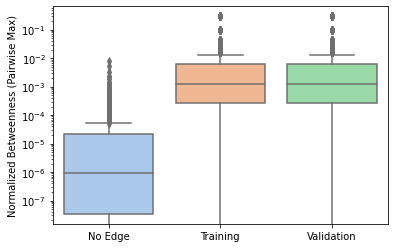

In [167]:
df = pd.DataFrame(
    data = {
    "Normalized Betweenness (Pairwise Max)" : no_edge_betweenness+training_betweenness+validation_betweenness,
    "" : ["No Edge"]*len(no_edge_betweenness)+["Training"]*len(training_betweenness)+["Validation"]*len(validation_betweenness)
    }
)

#palette = {"All Pairs": "black", "No Edge": "black", "Training": "#ABC9EA", "Validation": "#EFB792"}
palette = sns.color_palette("pastel")
g = sns.boxplot(x="", y="Normalized Betweenness (Pairwise Max)",
                data=df, palette=palette)
g.set_yscale("log")